<a href="https://colab.research.google.com/github/caroline-dainezi-fatec/Fatec-Mineracao-de-Dados-2SEM-2024/blob/main/Caroline_de_Souza_Dainezi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ATIVIDADE P1**

## Análise Exploratória de Dados

Links deste exercício:
- https://www.kaggle.com/datasets/zynicide/wine-reviews
- https://seaborn.pydata.org/
- https://www.wine-searcher.com/critics-17-wine+enthusiast

Fomos contratados por uma grande empresa distribuidora de vinhos. Nosso cliente deseja melhorar as vendas entregando produtos que agradem os diversos perfis de clientes. O foco do nosso projeto aqui é desenvolver uma análise exploratória nos [dados de avaliações de vinhos](https://www.kaggle.com/datasets/zynicide/wine-reviews).

Uma análise exploratória bem elaborada consiste em algumas etapas:

- Compreensão do negócio
- Compreensão dos dados
- Preparar os dados (limpeza e tratamento)
- Análise de dados (extrair informações relevantes e responder perguntas)
- Avaliação dos resultados

Nosso objetivo ao concluir esse projeto é responder as seguintes perguntas:

1. De onde vem o melhor vinho ?
2. O preço do vinho está relacionado com a qualidade ?
3. Certas variedades de uvas são de maior qualidade ?
4. Qual é o melhor vinho em cada faixa de preço ?
5. Que palavras são mais utilizadas para descrever um vinho ?

Vamos começar!

# **Importando as bibliotecas**

A biblioteca Seaborn oferece uma possibilidade de gerar os gráficos de forma mais simples, utilizando menos código.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# **Leitura do Dataset**

Lendo o arquivo .csv utilizando a biblioteca Pandas e mostrando as primeiras 5 linhas (índices 0 a 4).

In [3]:
df = pd.read_csv("/content/winemag-data-130k-v2.csv")
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


Exibindo somente as colunas que existem no dataset

In [4]:
df.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')

# **Sumário das colunas do dataset**

* **unnamed** - coluna de índice, descartável
* **country** - o país de origem do vinho
* **description** - descrição sobre o vinho (texto aberto)
* **designation** - vinhedo dentro da adega de onde as uvas foram tiradas
* **points** - avaliação do vinho (vai até 100, checar Wine Enthusiast, importante)
* **price** - preço do vinho
* **province** - província ou estado de origem do vinho
* **region_1** - região de origem do vinho
* **region_2** - região mais específica da origem do vinho (algumas com esse dado em branco, remover)
* **taster_name** - nome do avaliador
* **taster_twitter_handle** - Twitter do avaliador
* **title** - nome do vinho, com ano de fabricação
* **variety** - tipo de uvas utilizadas no vinho
* **winery** - adega onde foi feito o vinho

# **Informações técnicas sobre os dados**
Podemos ver a quantidade de registros, as colunas, seus nomes, quantos valores preenchidos cada coluna possui e seus tipos de dados utilizando o comando:



```
df.info()
```



In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


Das 129.971 linhas, foram identificadas colunas com dados faltantes, como a *region_2*, *taster_name* e *taster_twitter_handle*.

# **Pré-análise dos dados através do comando:**



```
df.describe()
```

Com esse comando, podemos ver estatísticas sobre as colunas numéricas que estão presentes no dataframe.

In [6]:
df.describe()

,Unnamed: 0,points,price
count,129971.000000,129971.000000,120975.000000
mean,64985.000000,88.447138,35.363389
std,37519.540256,3.039730,41.022218
min,0.000000,80.000000,4.000000
25%,32492.500000,86.000000,17.000000
50%,64985.000000,88.000000,25.000000
75%,97477.500000,91.000000,42.000000
max,129970.000000,100.000000,3300.000000


A coluna de pontos varia de **80 a 100**, com uma média de **88,4**. De acordo com o Wine Enthusiast, as classificações pela pontuação são:
* 98–100 – Classic
* 94–97 – Superb
* 90–93 – Excellent
* 87–89 – Very good
* 83–86 – Good
* 80–82 – Acceptable

Em resumo, a variação entre os valores mínimo e máximos na pontuação não é muito grande.


---


Enquanto isso, o **preço** de cada garrafa varia entre **\$4** para a mais barata e **\$3300** para a mais cara, com uma média de **\$35,30**. Pode-se dizer que a coluna de preços apresenta uma variação muito grande, com as mínimas e máximas muito afastadas uma da outra.

# **Contando a quantidade de vinhos avaliados em cada país**

A função value_counts() agrupa as linhas do dataframe e devolve a contagem de registros.

In [7]:
df["country"].value_counts()

,count
country,
US,54504
France,22093
Italy,19540
Spain,6645
Portugal,5691
Chile,4472
Argentina,3800
Austria,3345
Australia,2329


Os três países com mais vinhos avaliados foram os **EUA**, **França** e **Itália**. Nota-se também que o primeiro lugar tem mais que o dobro de vinhos em comparação com o segundo (54504 dos EUA contra 22093 da França).

# **Vendo os tipos de uva mais utilizados para fabricar os vinhos**

Utilizando a mesma função de agrupamento, podemos ver quais tipos de uva mais aparecem no dataset.

In [8]:
df["variety"].value_counts()

,count
variety,
Pinot Noir,13272
Chardonnay,11753
Cabernet Sauvignon,9472
Red Blend,8946
Bordeaux-style Red Blend,6915
...,...
Cabernet Sauvignon-Barbera,1
Sauvignonasse,1
Forcallà,1


O tipo de uva **"Pinot Noir"** é o mais utilizado, seguido pelo **"Chardonnay"** e **"Cabernet Sauvignon"**. Em contraste, existem alguns tipos de uva que só foram utilizados uma vez, como o **"Forcallà"** e o **"Meseguera"**.

# **Limpeza dos dados**

O processo de limpeza inclui remover colunas que não serão utilizadas e tratar valores não preenchidos. Para limpar o dataframe, deve-se criar uma cópia dele utilizando a função `copy()` para evitar perder informações no caso de algum erro.

In [9]:
df1 = df.copy()

Removendo do dataframe cópia as colunas que não serão utilizadas na análise através da função `drop()`.

In [10]:
df1 = df1.drop(["Unnamed: 0", "designation", "region_1", "region_2", "taster_name", "taster_twitter_handle"], axis=1)

df1.head()

,country,description,points,price,province,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,Sicily & Sardinia,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


Agora que temos somente as colunas necessárias, devem ser tratados os dados ausentes.

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      129908 non-null  object 
 1   description  129971 non-null  object 
 2   points       129971 non-null  int64  
 3   price        120975 non-null  float64
 4   province     129908 non-null  object 
 5   title        129971 non-null  object 
 6   variety      129970 non-null  object 
 7   winery       129971 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 7.9+ MB


Para saber quantos registros seriam perdidos ao apagar todos os que apresentam valores ausentes em uma coluna, a coluna **Non-Null** da função `info()` mostra essa informação.

Podemos também fazer alguns cálculos de proporção na coluna de preços, por exemplo, para sabermos a porcentagem de registros que possuem valores preenchidos.

`df1.shape` devolve uma **tupla das dimensões do dataframe** (quantidade de linhas e colunas). Na fórmula abaixo, queremos utilizar somente o índice 0 (quantidade de linhas).

In [13]:
df1.shape

(129971, 8)

In [12]:
print("{:.0%}".format(df1["price"].count()/df1.shape[0]))

93%


O valor acima indica que, se removermos todas os registros que não têm preço informado, 93% dos dados sobrariam. No caso de uma base de dados grande, podemos removê-las sem prejudicar a análise.

A função `dropna()` é utilizada para filtrar todos os registros que possuem preço, país ou tipo de uva nulos. Vale ressaltar que as colunas se mantém, somente os registros são eliminados.

In [14]:
df1 = df1.dropna(subset=["country", "price", "variety"])
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120915 entries, 1 to 129970
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      120915 non-null  object 
 1   description  120915 non-null  object 
 2   points       120915 non-null  int64  
 3   price        120915 non-null  float64
 4   province     120915 non-null  object 
 5   title        120915 non-null  object 
 6   variety      120915 non-null  object 
 7   winery       120915 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 8.3+ MB


# **Análise exploratória**

Visualizar os dados pode ajudar a iniciar a análise. No caso, abaixo começamos com a distribuição dos pontos de cada vinho.

Text(0, 0.5, 'Frequência')

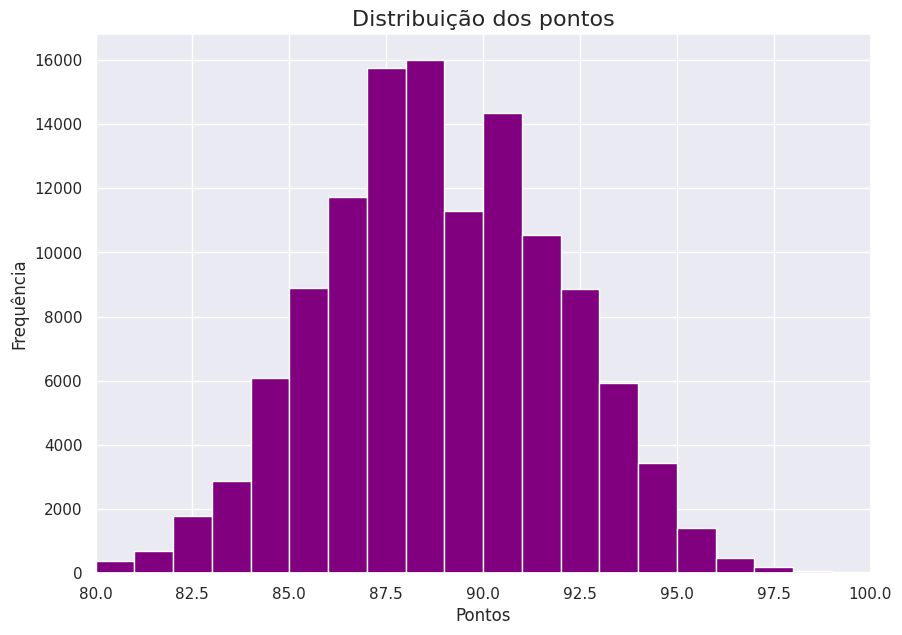

In [15]:
plt.figure(figsize=(10, 7))
plt.hist(data=df1, x='points',
        bins = np.arange (80, df1['points'].max()+1, 1),
        color = 'purple')
plt.xlim(80, 100)
plt.title('Distribuição dos pontos', fontsize=16)
plt.xlabel('Pontos')
plt.ylabel('Frequência')

A distribuição da pontuação dos vinhos é quase normal (ou seja, maioria dos valores se encontram no meio, por volta dos 85-93 pontos).

# **Top 10 países que mais produzem vinhos**


In [16]:
country_top_10 = df1["country"].value_counts()[:10]
country_top_10

,count
country,
US,54265
France,17776
Italy,16914
Spain,6573
Portugal,4875
Chile,4415
Argentina,3756
Austria,2799
Australia,2294


A variável `country_top_10` contém o conjunto de dados de países, contando os valores e armazenando os dez primeiros.

Usando o mesmo filtro, podemos gerar um gráfico de barras:

Text(0, 0.5, 'Total de avaliações')

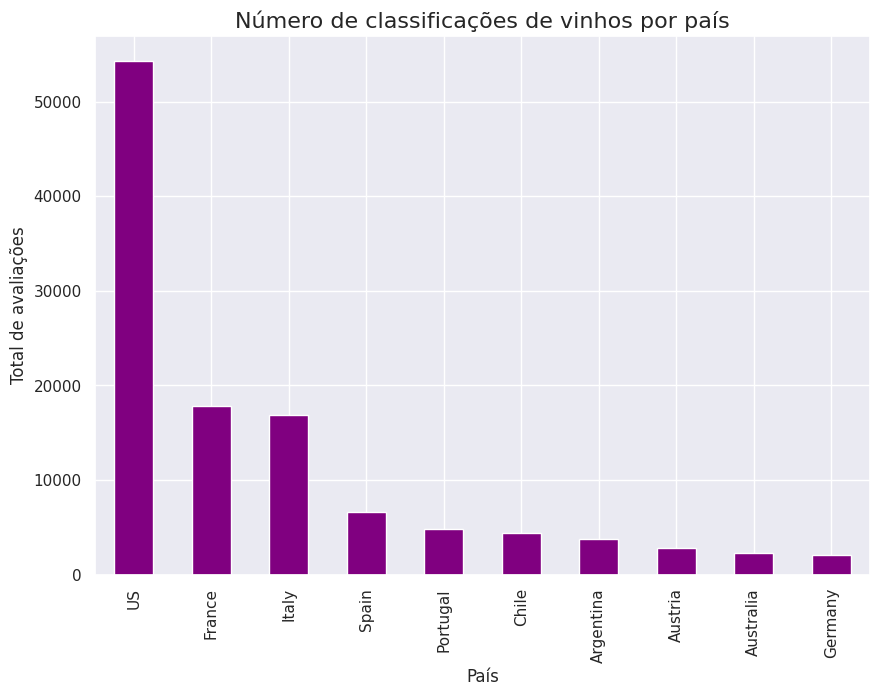

In [17]:
plt.figure(figsize=(10, 7))
country_top_10.plot(kind='bar', color='purple')
plt.title('Número de classificações de vinhos por país', fontsize=16)
plt.xlabel('País')
plt.ylabel('Total de avaliações')

# **Quantos países produzem vinho de melhor qualidade**


A variável `melhor_qualidade` guarda as médias dos pontos, agrupando-as por país e ordenando em ordem descrescente (maior para menor), ficando com as dez primeiras.

In [18]:
melhor_qualidade = df1.groupby("country")['points'].agg("mean")
melhor_qualidade = melhor_qualidade.sort_values(ascending=False)[:10]

# Converter em uma Serie o DataFrame usando o método to_frame()

melhor_qualidade.to_frame().style.background_gradient(cmap='Purples', high=0.5)

,points
country,
England,91.550725
India,90.222222
Austria,90.190782
Germany,89.836321
Canada,89.377953
Hungary,89.165517
China,89.000000
France,88.734867
Luxembourg,88.666667


# **Gerando um gráfico a partir do filtro**

<ipython-input-19-add47f205438>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, palette='Purples_r')


Text(0, 0.5, 'País')

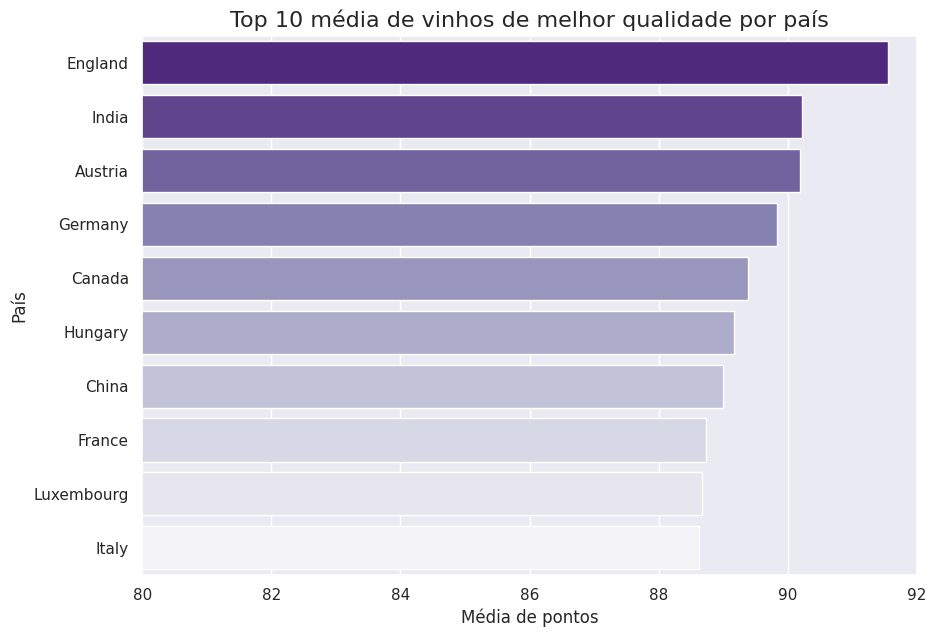

In [19]:
y = melhor_qualidade.index.to_series()
x = melhor_qualidade # Access the values in the series directly

plt.figure(figsize=(10, 7))
plt.xlim(80, 92)
sns.barplot(x=x, y=y, palette='Purples_r')
plt.title('Top 10 média de vinhos de melhor qualidade por país', fontsize=16)
plt.xlabel('Média de pontos')
plt.ylabel('País')

*Gráficos são ideais para mostrar de uma forma mais visual o que está acontecendo com os dados conforme fazemos os filtros.*

Podemos ver que o país com a melhor média de pontuação é a **Inglaterra**, seguida pela **Índia** e **Áustria**.

Uma possível razão para a Inglaterra ter ficado em primeiro é o fato de a base de dados não ter muitos vinhos do país e eles tenham uma pontuação alta, aumentando assim a média.

# **Números de vinhos por país com classificações altas (95+)**

In [20]:
high_scores = df1[df1["points"]>=95]
high_scores["country"].value_counts()

,count
country,
US,991
France,509
Italy,326
Austria,103
Portugal,96
Germany,62
Spain,51
Australia,47
Argentina,11


Os países com classificação mais alta (95-100 pontos) diferem dos países apresentados no gráfico de pontuações mais altas com base na média. Um gráfico boxplot permite que vejamos o máximo, mínimo e média das pontuações de cada país.

Como os dados apresentam muitos vinhos dos EUA e poucos da Inglaterra, a comparação fica injusta, pois os EUA certamente terá maior variedade de pontuações devido à quantidade, o que diminui sua média.

Text(0, 0.5, 'País')

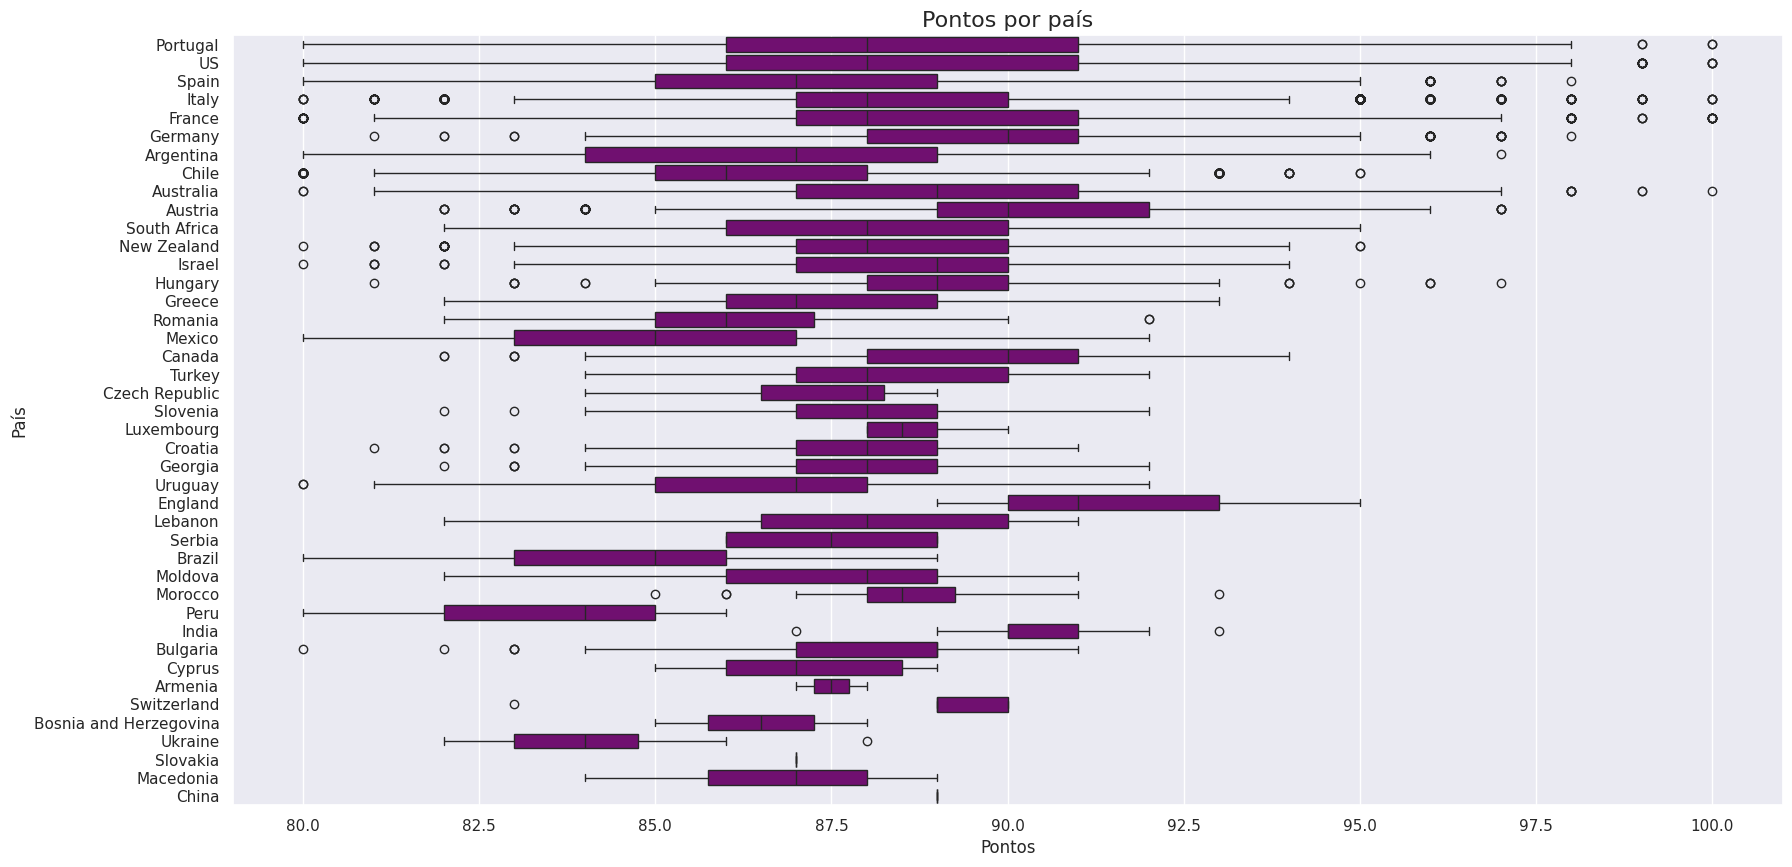

In [21]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df1, x='points', y='country', color='Purple')
plt.title('Pontos por país', fontsize=16)
plt.xlabel('Pontos')
plt.ylabel('País')

É possível reparar, por exemplo, que **Portugal**, **EUA**, **Itália**, **França** e **Austrália** produziram vinhos da maior qualidade (pontuação perfeita de 100), enquanto a **Inglaterra** não o fez.

# **Preço dos vinhos nos países**

<ipython-input-22-65d84f7e5db0>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, palette='Purples_r')


Text(0, 0.5, 'País')

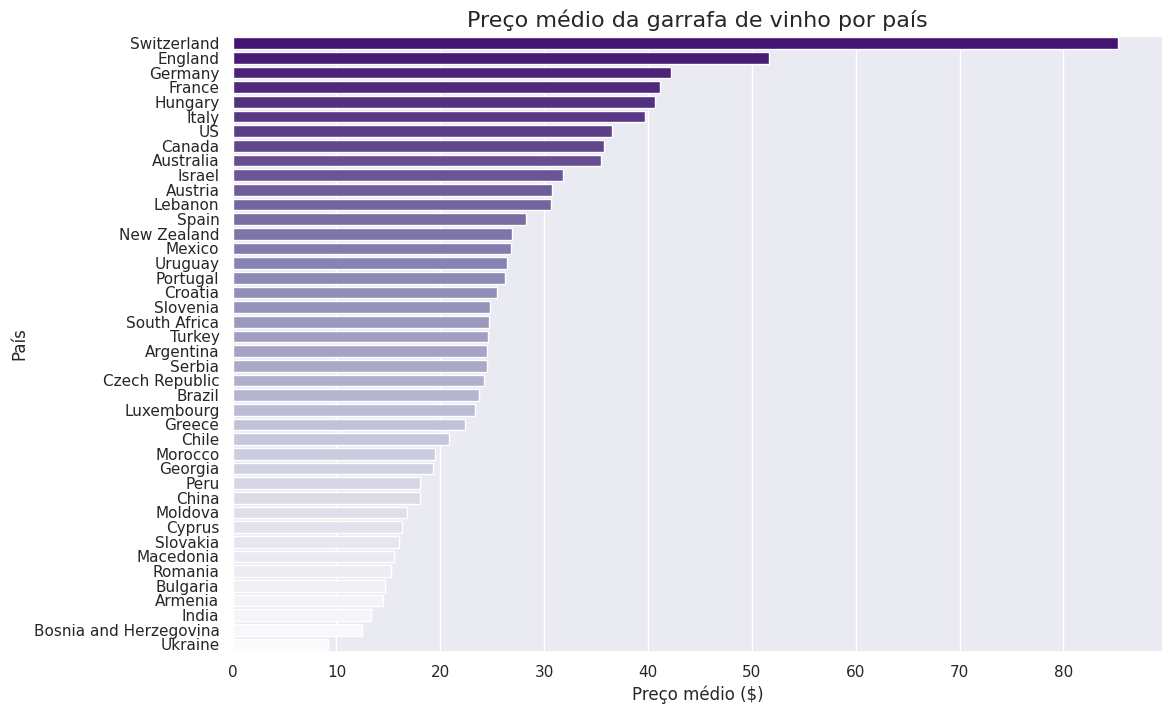

In [22]:
average_price = df1.groupby("country")["price"].mean() # Calculate the mean of the 'price' column only
average_price = average_price.sort_values(ascending=False) # Sort values in descending order
y = average_price.index.to_series()
x = average_price.values # Use vales instead of accessing by key

plt.figure(figsize=(12, 8))
sns.barplot(x=x, y=y, palette='Purples_r')
plt.title('Preço médio da garrafa de vinho por país', fontsize=16)
plt.xlabel('Preço médio ($)')
plt.ylabel('País')

Observando o gráfico, é seguro assumir que a **Suíça**, de longe, tem os vinhos mais caros, com o preço médio disparando na frente com mais de \$80 de média, enquanto a **Ucrânia** é seu oposto completo, com a média de menos de \$10 por garrafa.

# **Relação de preço e qualidade do vinho**

As investigações sobre o preço dos vinhos por país levanta uma dúvida: se o valor do vinho é relacionado com a sua qualidade. Para descobrir isto, podemos usar histogramas.

Text(0, 0.5, 'Frequência')

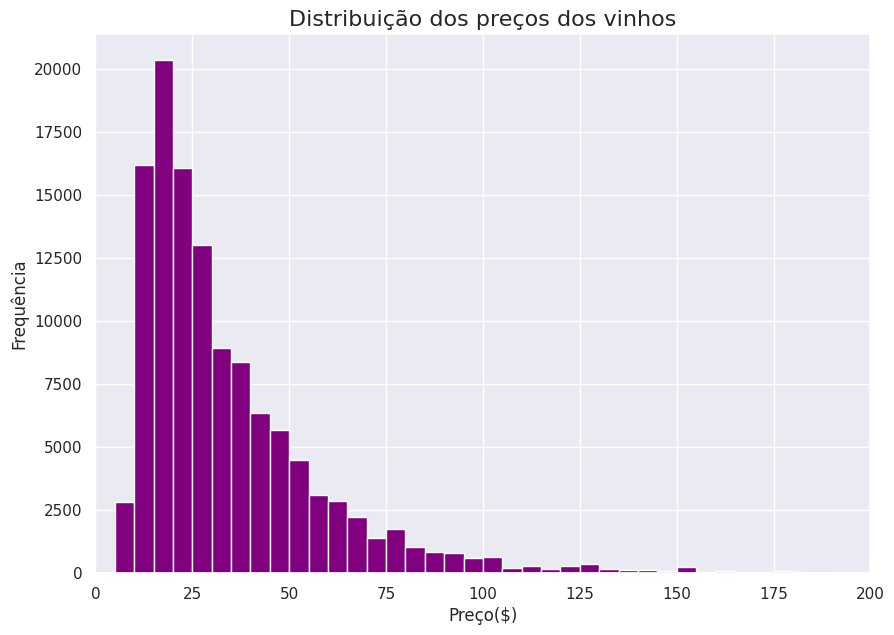

In [26]:
plt.figure(figsize=(10, 7))
bins = np.arange(0, df1["price"].max()+5, 5)
plt.hist(data=df1, x='price', bins=bins, color='Purple')
plt.xlim(0, 200)
plt.title('Distribuição dos preços dos vinhos', fontsize=16)
plt.xlabel('Preço($)')
plt.ylabel('Frequência')

A maior concentração de preço dos vinhos se encontra na parte esquerda do gráfico, onde estão os menores valores.

O ideal seria aproximar os dados de uma distribuição normal. Para isso, pode-se utilizar uma transformação logarítmica.

In [27]:
# Distribuição normal
df1["price"].describe()

,price
count,120915.000000
mean,35.368796
std,41.031188
min,4.000000
25%,17.000000
50%,25.000000
75%,42.000000
max,3300.000000


In [28]:
# Distribuição logarítmica
np.log10(df1["price"].describe())

,price
count,5.082480
mean,1.548620
std,1.613114
min,0.602060
25%,1.230449
50%,1.397940
75%,1.623249
max,3.518514


# **Utilizando os dados da transformação logarítmica para o histograma**

Text(0, 0.5, 'Frequência')

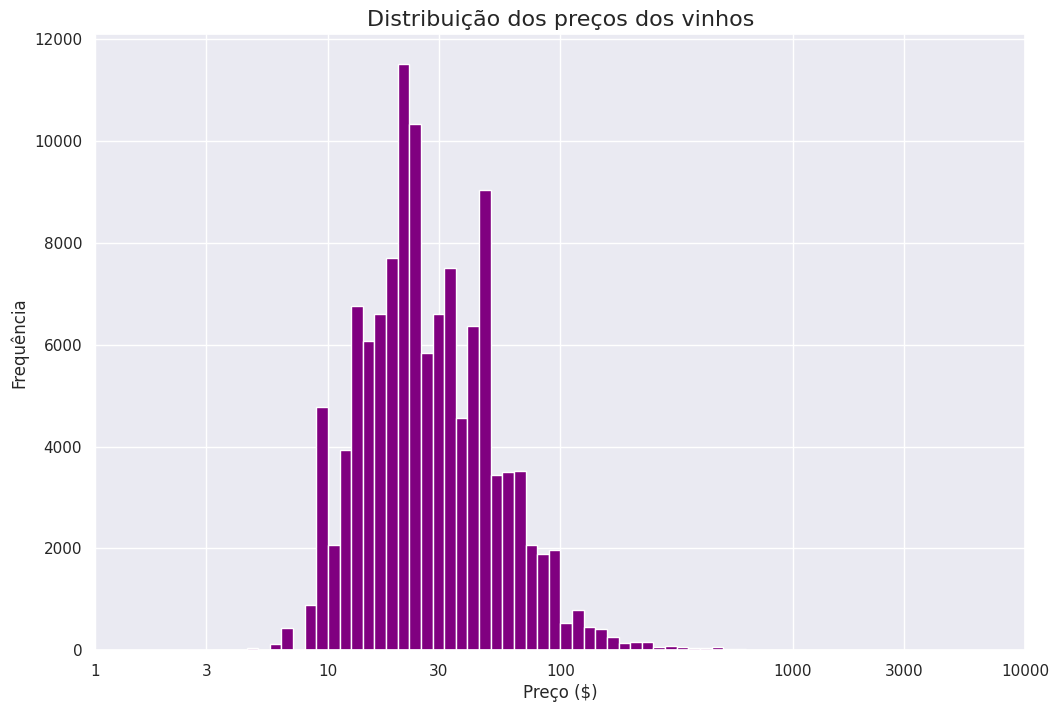

In [29]:
plt.figure(figsize=(12, 8))
bins = 10 ** np.arange(0.5, 3.5 + 0.05, 0.05)
ticks = [1, 3, 10, 30, 100, 1000, 3000, 10000]

plt.hist(data=df1, x='price', bins=bins, color='Purple')
plt.title('Distribuição dos preços dos vinhos', fontsize=16)
plt.xscale('log')
plt.xticks(ticks, ticks)
plt.xlabel('Preço ($)')
plt.ylabel('Frequência')

Com as alterações, a distribuição do gráfico fica mais próxima do normal. Próximo aos **\$10**, **\$20** e aos **\$50** se encontram picos nos valores.

Agora, um gráfico tipo scatter para visualizar se há alguma correlação entre a pontuação e o valor do vinho.

Text(0, 0.5, 'Pontos')

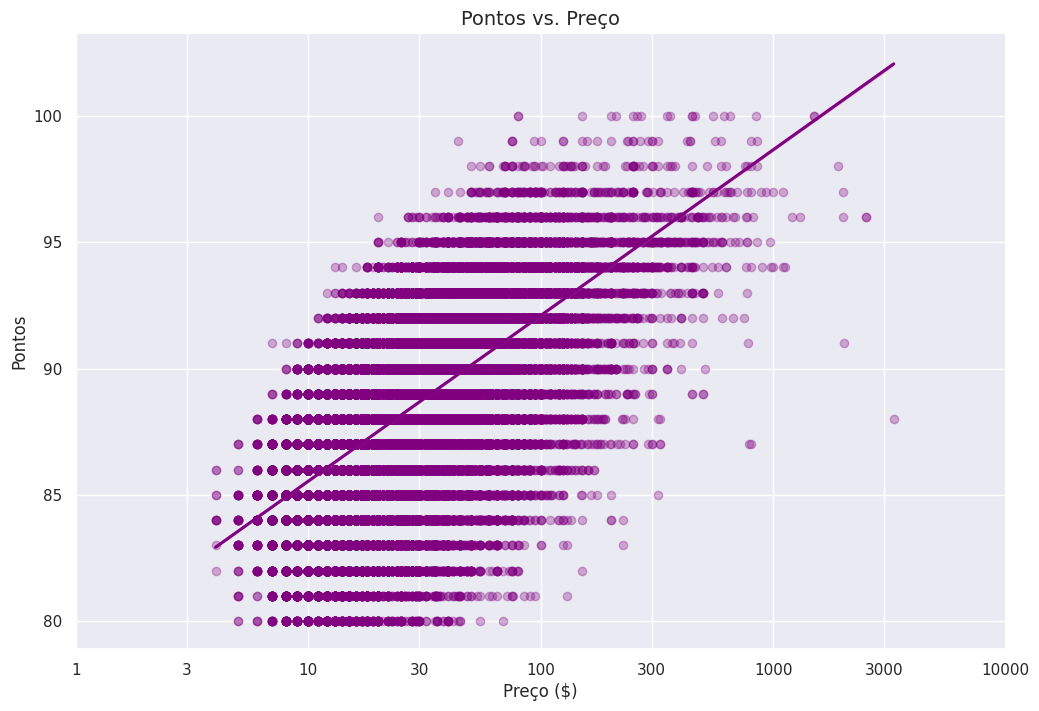

In [31]:
# Heatmap (mapa de calor)

x = [1, 3, 10, 30, 100, 300, 1000, 3000, 10000]

plt.figure(figsize=(12, 8))
sns.regplot(x='price', y='points', data=df1, color='Purple', logx=True, scatter_kws={'alpha':0.3})
plt.title('Pontos vs. Preço', fontsize=14)
plt.xscale('log')
plt.xticks(x, x)
plt.xlabel('Preço ($)')
plt.ylabel("Pontos")

O gráfico mostra uma relação positiva entre a pontuação e o preço, ou seja, vinhos mais caros tendem a receber melhores pontuações. Também vemos dois pontos afastados (\$4 e \$3000). Listando quais vinhos são esses:

In [32]:
df1[df1["price"] == df1["price"].min()][:1]

,country,description,points,price,province,title,variety,winery
1987,Spain,Berry and cherry aromas are surprisingly sturd...,85,4.0,Central Spain,Felix Solis 2013 Flirty Bird Syrah (Vino de la...,Syrah,Felix Solis


In [33]:
df1[df1["price"] == df1["price"].max()][:1]

,country,description,points,price,province,title,variety,winery
80290,France,This ripe wine shows plenty of blackberry frui...,88,3300.0,Bordeaux,Château les Ormes Sorbet 2013 Médoc,Bordeaux-style Red Blend,Château les Ormes Sorbet


O vinho mais barato recebeu uma pontuação de **85** ao custo de **\$4**, enquanto o vinho mais caro recebeu **88** pontos e custa **\$3300**. Isso implica que, nem sempre, uma diferença grande de preço resulta em uma diferença grande de pontuação.